# Hypothesis 3 Visualizations
## Is there a correlation between increase in battery range and annual car registrations?n

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV file
df = pd.read_csv("cleaned_vehicle_data.csv")
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86489 entries, 0 to 86488
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VIN (1-10)             86489 non-null  object 
 1   County                 86489 non-null  object 
 2   City                   86489 non-null  object 
 3   State                  86489 non-null  object 
 4   Postal Code            86489 non-null  int64  
 5   Model Year             86489 non-null  int64  
 6   Make                   86489 non-null  object 
 7   Model                  86489 non-null  object 
 8   Electric Vehicle Type  86489 non-null  object 
 9   Electric Range         86489 non-null  int64  
 10  Latitude               86489 non-null  float64
 11  Longitude              86489 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 7.9+ MB
None


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.54468,-122.374105


In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.544680,-122.374105
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.059252,-122.943445
2,5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,47.083975,-122.780830
3,1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,46.856085,-122.854030
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,46.597394,-120.524012


In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Latitude,Longitude
count,86489.000000,86489.000000,86489.000000,86489.000000,86489.000000
mean,98284.147186,2018.491901,121.018673,47.453075,-122.066806
std,315.486311,3.099707,99.165399,0.640970,1.096151
min,98001.000000,1997.000000,6.000000,45.583590,-124.614078
25%,98057.000000,2017.000000,32.000000,47.323449,-122.451530
50%,98155.000000,2018.000000,83.000000,47.601800,-122.300312
75%,98391.000000,2020.000000,215.000000,47.718625,-122.151665
max,99403.000000,2024.000000,337.000000,48.992052,-117.059519


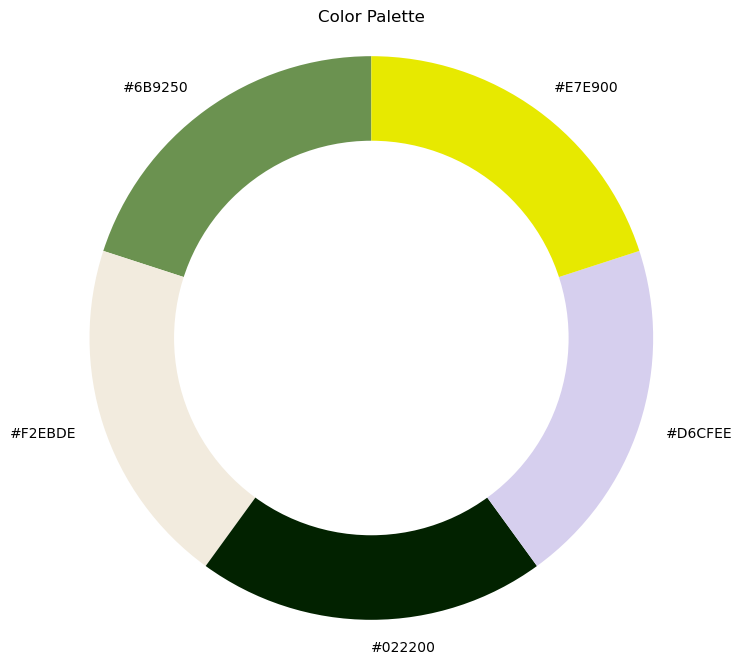

In [5]:
color_df = [10, 10, 10, 10, 10]
labels = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(color_df, labels=labels, startangle=90, colors=['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a white circle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Color Palette')
plt.show()

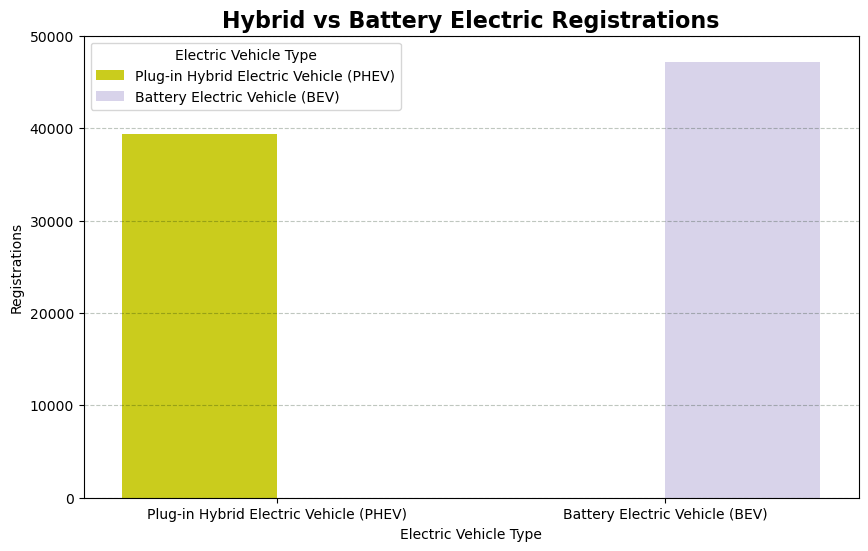

In [6]:
# Step 1: Get the data
# Create the plot
plt.figure(figsize=(10,6))
sns.countplot(x='Electric Vehicle Type', hue='Electric Vehicle Type', data=df, palette=['#E7E900' ,'#D6CFEE'])

# Customizations
plt.title("Hybrid vs Battery Electric Registrations", fontsize=16, fontweight="bold")
plt.ylim(0, 50000)
plt.ylabel('Registrations')

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.25)


# Show
plt.show()

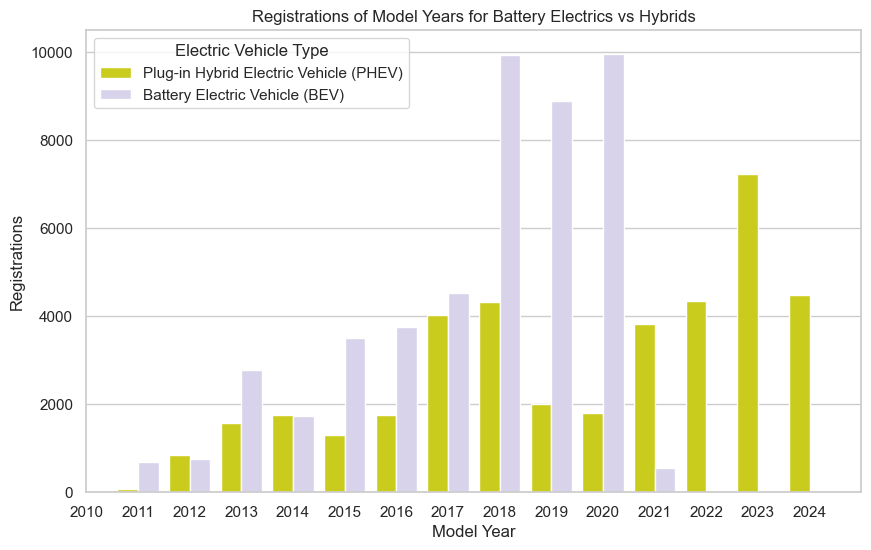

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', hue='Electric Vehicle Type', data=df, palette=['#E7E900' ,'#D6CFEE'])

plt.title('Registrations of Model Years for Battery Electrics vs Hybrids')
plt.xlabel('Model Year')
plt.ylabel('Registrations')
plt.ylim(0, 10500)
plt.xlim(7, 22)

plt.show()

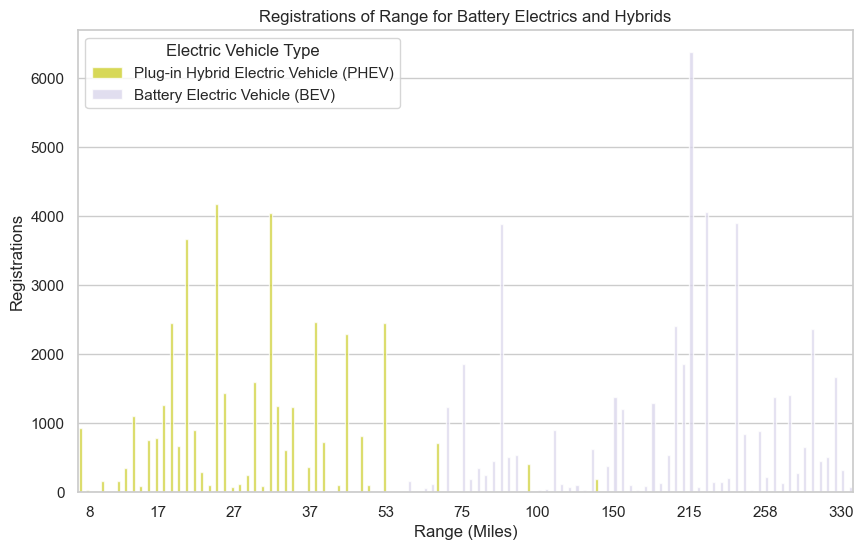

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Range', hue='Electric Vehicle Type', data=df, palette=['#E7E900','#D6CFEE'], alpha=0.75)

plt.title('Registrations of Range for Battery Electrics and Hybrids')
plt.xlabel('Range (Miles)')
plt.ylabel('Registrations')

plt.xticks(ticks=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

In [9]:
mask = df["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"

# Now we can create the new dataframe out of the mask with the rest_index function
bev_df = df.loc[mask].reset_index(drop=True)

In [10]:
bev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,47.083975,-122.780830
1,5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,46.597394,-120.524012
2,5YJ3E1EB5L,Snohomish,Mountlake Terrace,WA,98043,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,47.784160,-122.308420
3,1G1FW6S03J,Snohomish,Bothell,WA,98021,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238,47.797727,-122.210730
4,5YJSA1S22F,King,Seattle,WA,98121,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,47.615460,-122.344125


In [11]:
mask = df["Electric Vehicle Type"] == "Plug-in Hybrid Electric Vehicle (PHEV)"

# Now we can create the new dataframe out of the mask with the rest_index function
hybrid_df = df.loc[mask].reset_index(drop=True)	
hybrid_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.544680,-122.374105
1,WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.059252,-122.943445
2,1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,46.856085,-122.854030
3,1C4JJXP66P,Thurston,Olympia,WA,98501,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),21,47.043535,-122.896920
4,1G1RA6S53H,Kitsap,Keyport,WA,98345,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),53,47.702126,-122.625012


C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


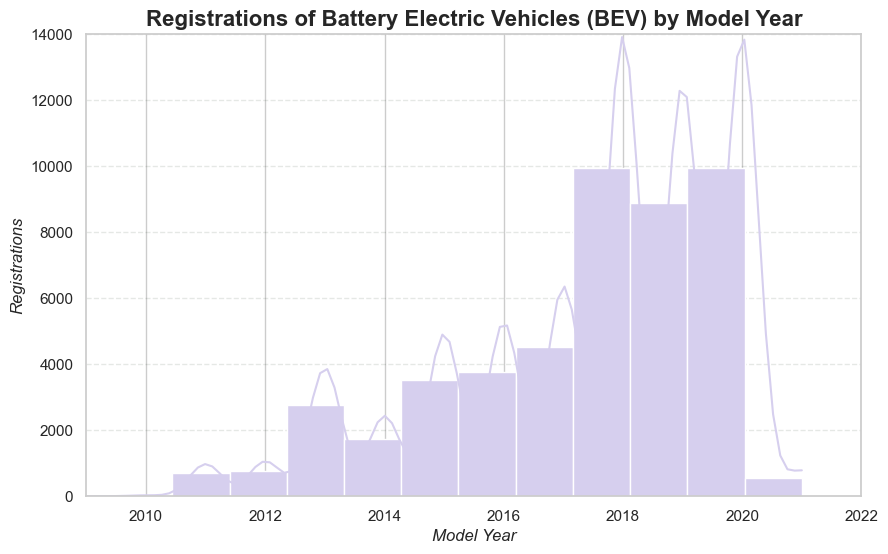

In [12]:
# Create the plot
x=bev_df['Model Year']
plt.figure(figsize=(10,6))
sns.histplot(x, bins=25, color='#D6CFEE', alpha=1, kde=True)

# Customizations
plt.title("Registrations of Battery Electric Vehicles (BEV) by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 14000)
plt.xlim(2009, 2022)

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Show
plt.show()

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


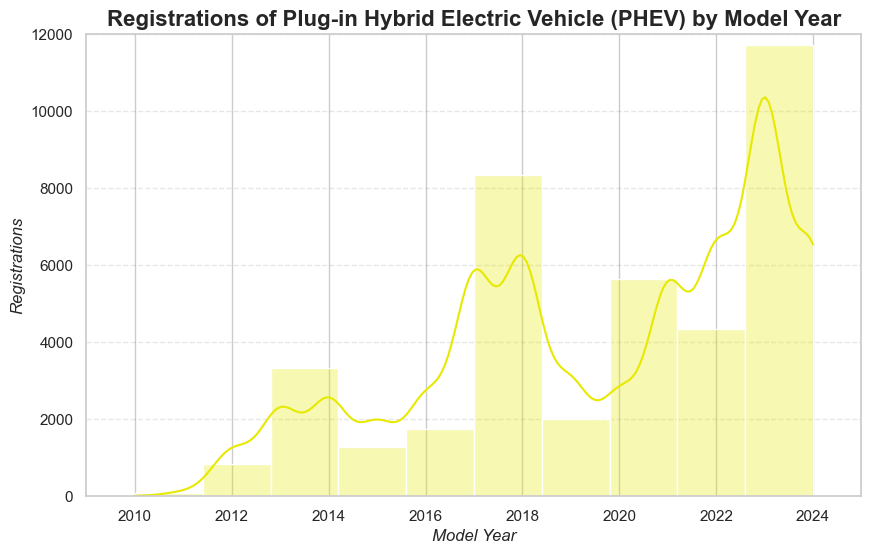

In [13]:
# Create the plot
x=hybrid_df['Model Year']
plt.figure(figsize=(10,6))
sns.histplot(x, bins=10, color="#E7E900", alpha=0.3, kde=True)

# Customizations
plt.title("Registrations of Plug-in Hybrid Electric Vehicle (PHEV) by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 12000)
plt.xlim(2009, 2025)

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Show
plt.show()

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


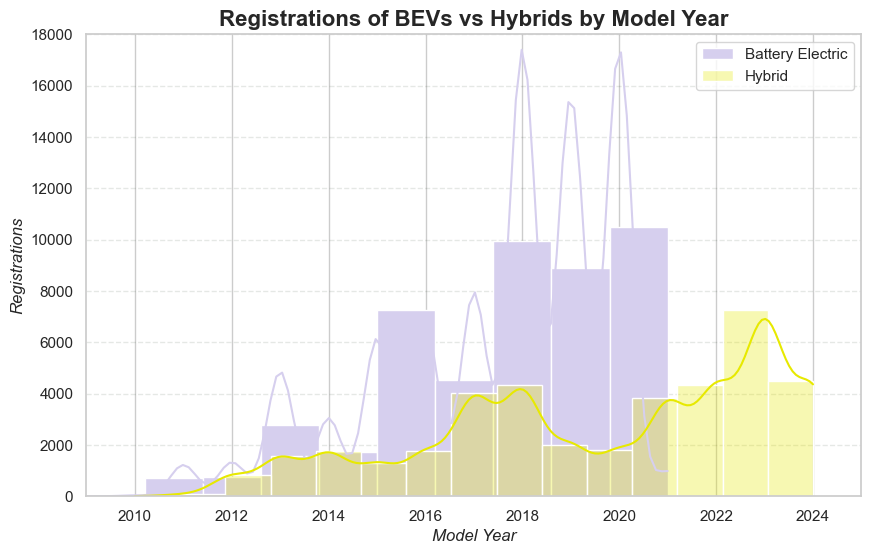

In [14]:
# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(x=bev_df['Model Year'], color='#D6CFEE', alpha=1, label='Battery Electric', bins=20, kde=True)
sns.histplot(x=hybrid_df['Model Year'], color='#E7E900', alpha=0.30, label='Hybrid', bins=15, kde=True)

# Customizations
plt.title("Registrations of BEVs vs Hybrids by Model Year", fontsize=16, fontweight="bold")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.ylim(0, 18000)
plt.xlim(2009, 2025)
plt.legend()

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Show
plt.show()

In [15]:
df['Model Year'].nunique()

22

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


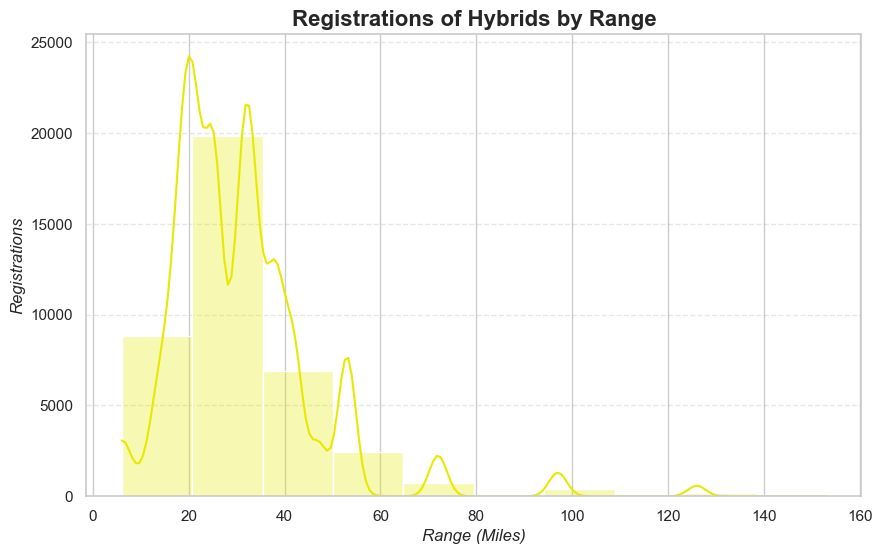

In [16]:
# Create the plot
x=hybrid_df['Electric Range']
plt.figure(figsize=(10,6))
sns.histplot(x, bins=10, color="#E7E900", alpha=0.3, kde=True)

# Customizations
plt.title("Registrations of Hybrids by Range", fontsize=16, fontweight="bold")
plt.xlabel("Range (Miles)", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Show
plt.show()

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


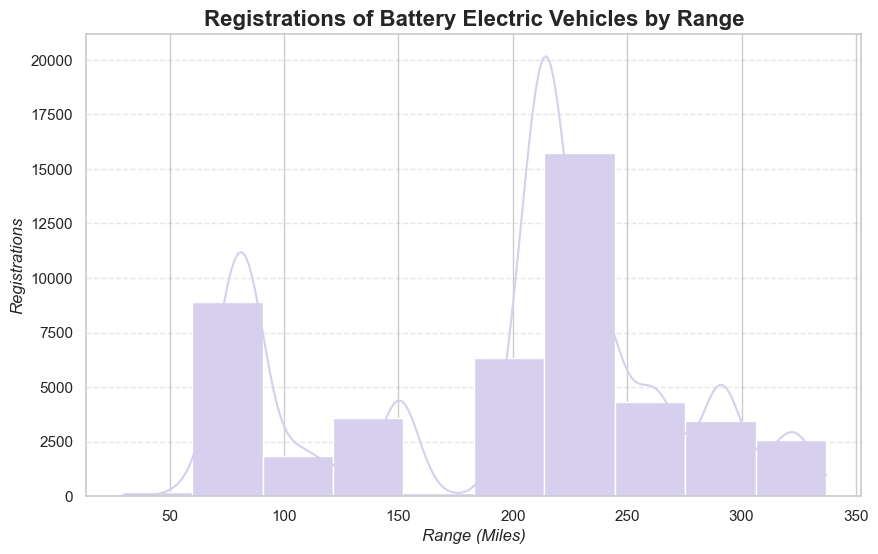

In [17]:
# Create the plot
x=bev_df['Electric Range']
plt.figure(figsize=(10,6))
sns.histplot(x, bins=10, color='#D6CFEE', kde=True, alpha=1)

# Customizations
plt.title("Registrations of Battery Electric Vehicles by Range", fontsize=16, fontweight="bold")
plt.xlabel("Range (Miles)", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Show
plt.show()

C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


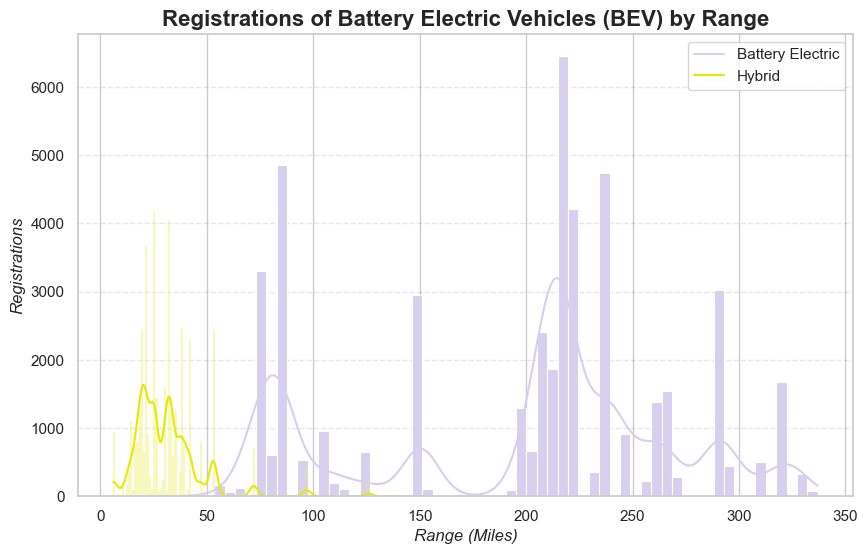

In [18]:
# Create the plot
plt.figure(figsize=(10,6))
sns.histplot(x=bev_df['Electric Range'], color='#D6CFEE', kde=True, alpha=1)
sns.histplot(x=hybrid_df['Electric Range'], color="#E7E900", alpha=0.3, kde=True)

# Customizations
plt.title("Registrations of Battery Electric Vehicles (BEV) by Range", fontsize=16, fontweight="bold")
plt.xlabel("Range (Miles)", fontsize=12, fontstyle="italic")
plt.ylabel("Registrations", fontsize=12, fontstyle="italic")
plt.legend(labels=["Battery Electric", "Hybrid"])

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)


# Show
plt.show()

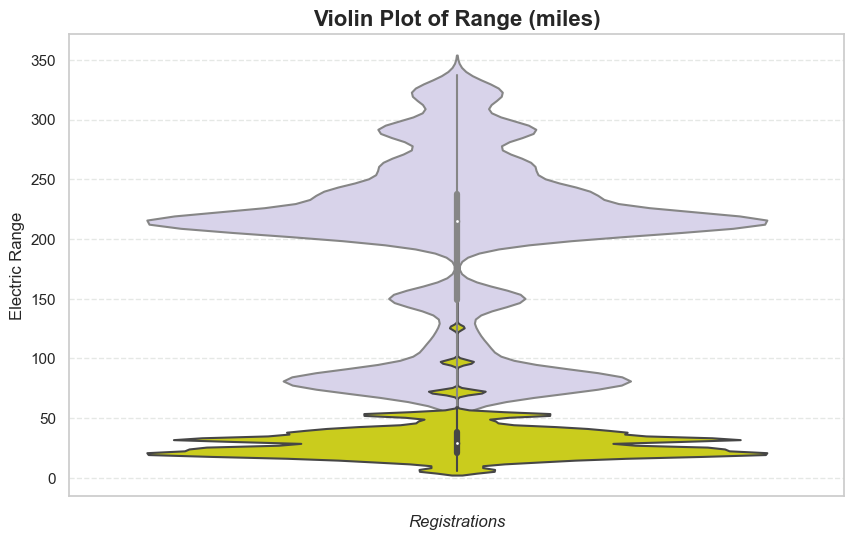

In [19]:
# Create the plot
plt.figure(figsize=(10,6))
sns.violinplot(y=bev_df['Electric Range'], color='#D6CFEE', alpha=1, label='Battery Electric')
sns.violinplot(y=hybrid_df['Electric Range'], color='#E7E900', alpha=0.3, label='Hybrid')

# Customizations
plt.title("Violin Plot of Range (miles)", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Show
plt.show()

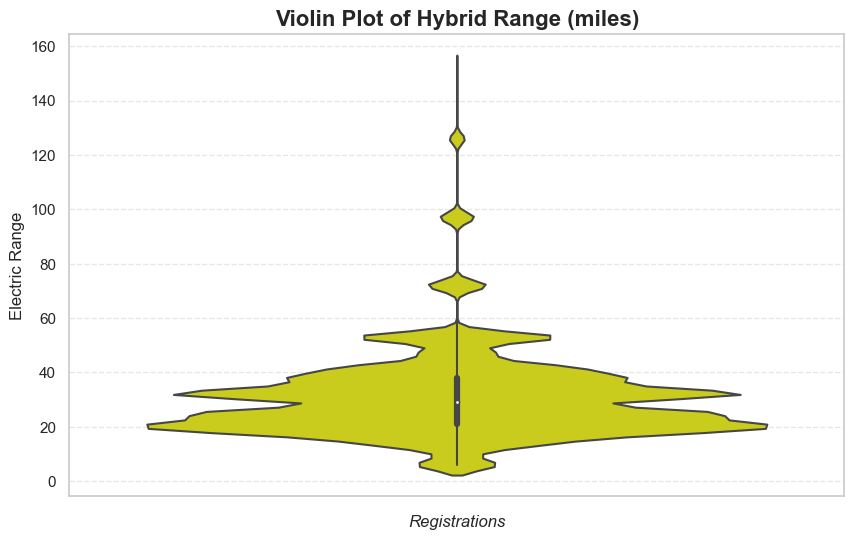

In [20]:
# Create the plot
plt.figure(figsize=(10,6))
sns.violinplot(y=hybrid_df['Electric Range'], color='#E7E900', alpha=0.3, label='Hybrid')

# Customizations
plt.title("Violin Plot of Hybrid Range (miles)", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Show
plt.show()

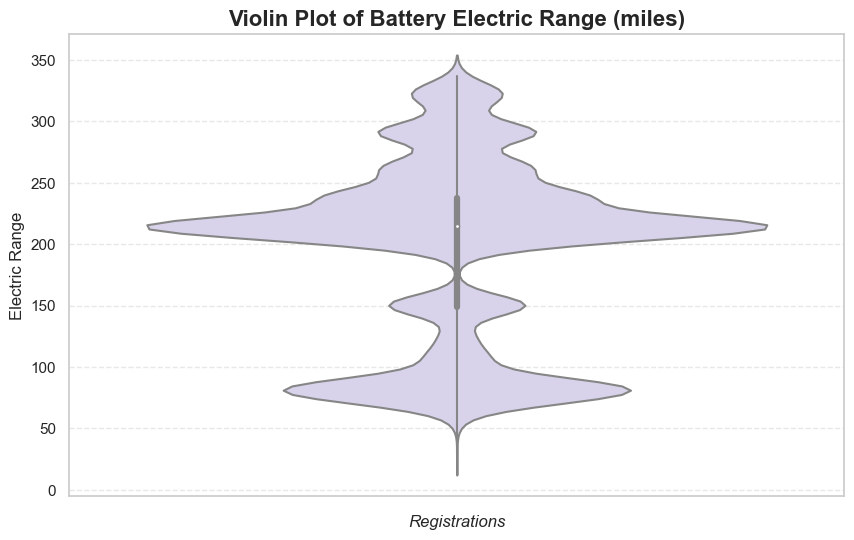

In [21]:
# Create the plot
plt.figure(figsize=(10,6))
sns.violinplot(y=bev_df['Electric Range'], color='#D6CFEE', alpha=1, label='Battery Electric')

# Customizations
plt.title("Violin Plot of Battery Electric Range (miles)", fontsize=16, fontweight="bold")
plt.xlabel("Registrations", fontsize=12, fontstyle="italic")

plt.grid(color="#022200", axis="y", linestyle="--", alpha=0.1)

# Show
plt.show()